In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers

Using TensorFlow backend.


In [2]:
train_dir = '../input/traindat'
#test_dir = '../input/projectdata/asl_alphabet_test/asl_alphabet_test'

In [3]:
def load_unique():
    size_img = 224,224
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

unique_labels =  ['B', 'C', 'A']


In [4]:
labels_dict = {'A':0,'B':1,'C':2}

def load_data():
    images = []
    labels = []
    size = 224,224
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            if folder == 'A':
                labels.append(labels_dict['A'])
            elif folder == 'B':
                labels.append(labels_dict['B'])
            elif folder == 'C':
                labels.append(labels_dict['C'])
        
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)   #one-hot encoding
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [5]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA FROM : B | C | A | 
Loaded 5274 images for training, Train data shape = (5274, 224, 224, 3)
Loaded 1319 images for testing Test data shape = (1319, 224, 224, 3)


In [6]:
def build_model():
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
    model.add(Conv2D(32, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = 3, padding = 'same', strides = 2 , activation = 'relu'))
    model.add(MaxPool2D(3))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

In [7]:
model=build_model()

MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      18464     
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 

In [8]:
def fit_model():
    history = model.fit(X_train, Y_train, batch_size = 64, epochs = 15, validation_split = 0.1)
    return history

In [9]:
model_history = fit_model()

Train on 4746 samples, validate on 528 samples
Epoch 1/15
4746/4746 [==============================] - 19s 4ms/step - loss: 0.7203 - accuracy: 0.6633 - val_loss: 0.9915 - val_accuracy: 0.4962
Epoch 2/15
4746/4746 [==============================] - 15s 3ms/step - loss: 0.3207 - accuracy: 0.8738 - val_loss: 1.0013 - val_accuracy: 0.5492
Epoch 3/15
4746/4746 [==============================] - 15s 3ms/step - loss: 0.2133 - accuracy: 0.9100 - val_loss: 0.5929 - val_accuracy: 0.8939
Epoch 4/15
4746/4746 [==============================] - 15s 3ms/step - loss: 0.1516 - accuracy: 0.9444 - val_loss: 0.6049 - val_accuracy: 0.8542
Epoch 5/15
4746/4746 [==============================] - 15s 3ms/step - loss: 0.1037 - accuracy: 0.9633 - val_loss: 0.9502 - val_accuracy: 0.6004
Epoch 6/15
4746/4746 [==============================] - 15s 3ms/step - loss: 0.0481 - accuracy: 0.9819 - val_loss: 1.5456 - val_accuracy: 0.5928
Epoch 7/15
4746/4746 [==============================] - 15s 3ms/step - loss: 0.0524

### For this model we have an accuracy of 97.35%, validation accuracy of 97.92% and test accuracy 97.57%.

In [10]:
model.evaluate(X_test,Y_test)

1319/1319 [==============================] - 2s 1ms/step


[0.08675836381088774, 0.9757391810417175]

In [11]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()
uniq_labels = sorted(os.listdir(train_dir))

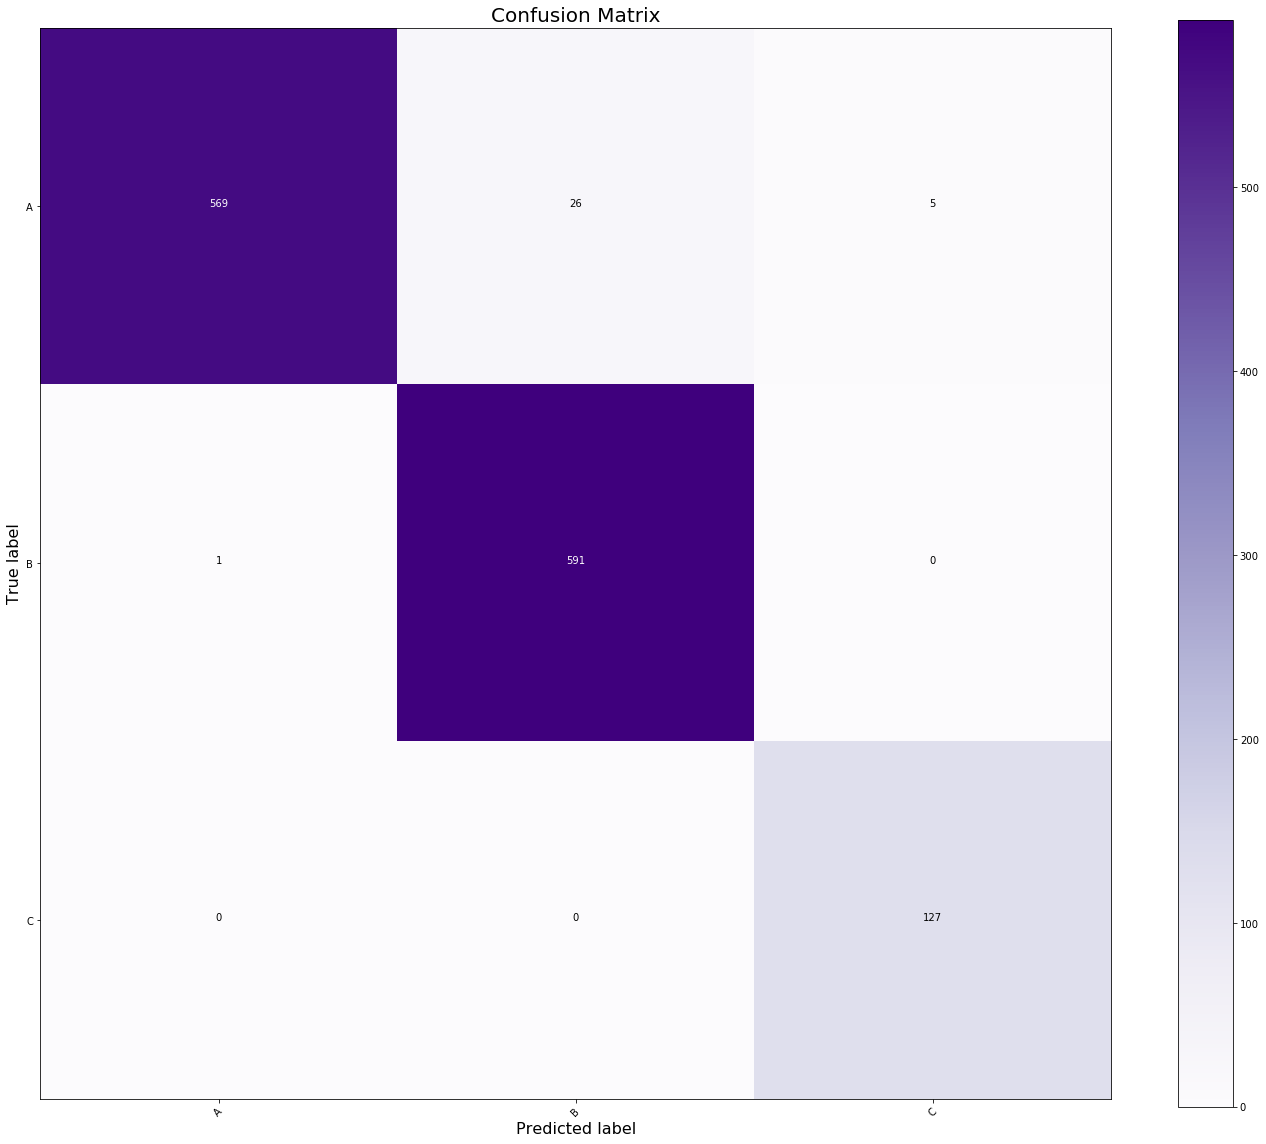

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(Y_test, y_test_pred)

In [13]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D

## Alex Net

In [14]:
model1 = Sequential()
# 1st Convolutional Layer
model1.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model1.add(Activation('relu'))
# Pooling 
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model1.add(BatchNormalization())

# 2nd Convolutional Layer
model1.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model1.add(Activation('relu'))
# Pooling
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model1.add(BatchNormalization())

# 3rd Convolutional Layer
model1.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model1.add(Activation('relu'))
# Batch Normalisation
model1.add(BatchNormalization())

# 4th Convolutional Layer
model1.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model1.add(Activation('relu'))
# Batch Normalisation
model1.add(BatchNormalization())

# 5th Convolutional Layer
model1.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model1.add(Activation('relu'))
# Pooling
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model1.add(BatchNormalization())

# Passing it to a dense layer
model1.add(Flatten())
# 1st Dense Layer
model1.add(Dense(8192, input_shape=(224*224*3,)))
model1.add(Activation('relu'))
# Add Dropout to prevent overfitting
model1.add(Dropout(0.7))
# Batch Normalisation
model1.add(BatchNormalization())

# 2nd Dense Layer
model1.add(Dense(8192))
model1.add(Activation('relu'))
# Add Dropout
model1.add(Dropout(0.7))
# Batch Normalisation
model1.add(BatchNormalization())

# 3rd Dense Layer
model1.add(Dense(4096))
model1.add(Activation('relu'))
# Add Dropout
model1.add(Dropout(0.6))
# Batch Normalisation
model1.add(BatchNormalization())

In [15]:
# Output Layer
model1.add(Dense(3))
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)        

In [17]:
sgd = SGD(lr=0.001)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [18]:
model1.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1,validation_data=(X_test,Y_test))

Train on 5274 samples, validate on 1319 samples
Epoch 1/50
5274/5274 [==============================] - 10s 2ms/step - loss: 1.5053 - accuracy: 0.3690 - val_loss: 1.1332 - val_accuracy: 0.2441
Epoch 2/50
5274/5274 [==============================] - 8s 2ms/step - loss: 1.2881 - accuracy: 0.4420 - val_loss: 1.0323 - val_accuracy: 0.4716
Epoch 3/50
5274/5274 [==============================] - 8s 2ms/step - loss: 1.0699 - accuracy: 0.5442 - val_loss: 0.6899 - val_accuracy: 0.6725
Epoch 4/50
5274/5274 [==============================] - 8s 1ms/step - loss: 0.8592 - accuracy: 0.6337 - val_loss: 0.5000 - val_accuracy: 0.8021
Epoch 5/50
5274/5274 [==============================] - 8s 1ms/step - loss: 0.7117 - accuracy: 0.7122 - val_loss: 0.3790 - val_accuracy: 0.8886
Epoch 6/50
5274/5274 [==============================] - 8s 1ms/step - loss: 0.5732 - accuracy: 0.7742 - val_loss: 0.2893 - val_accuracy: 0.9090
Epoch 7/50
5274/5274 [==============================] - 8s 2ms/step - loss: 0.4762 - ac

### We achieved the accuracy of 99.79%, validation accuracy of 99.39% and test accuracy of 99.39%.

In [19]:
model1.evaluate(X_test,Y_test)

1319/1319 [==============================] - 1s 608us/step


[0.013989416912222205, 0.9939348101615906]

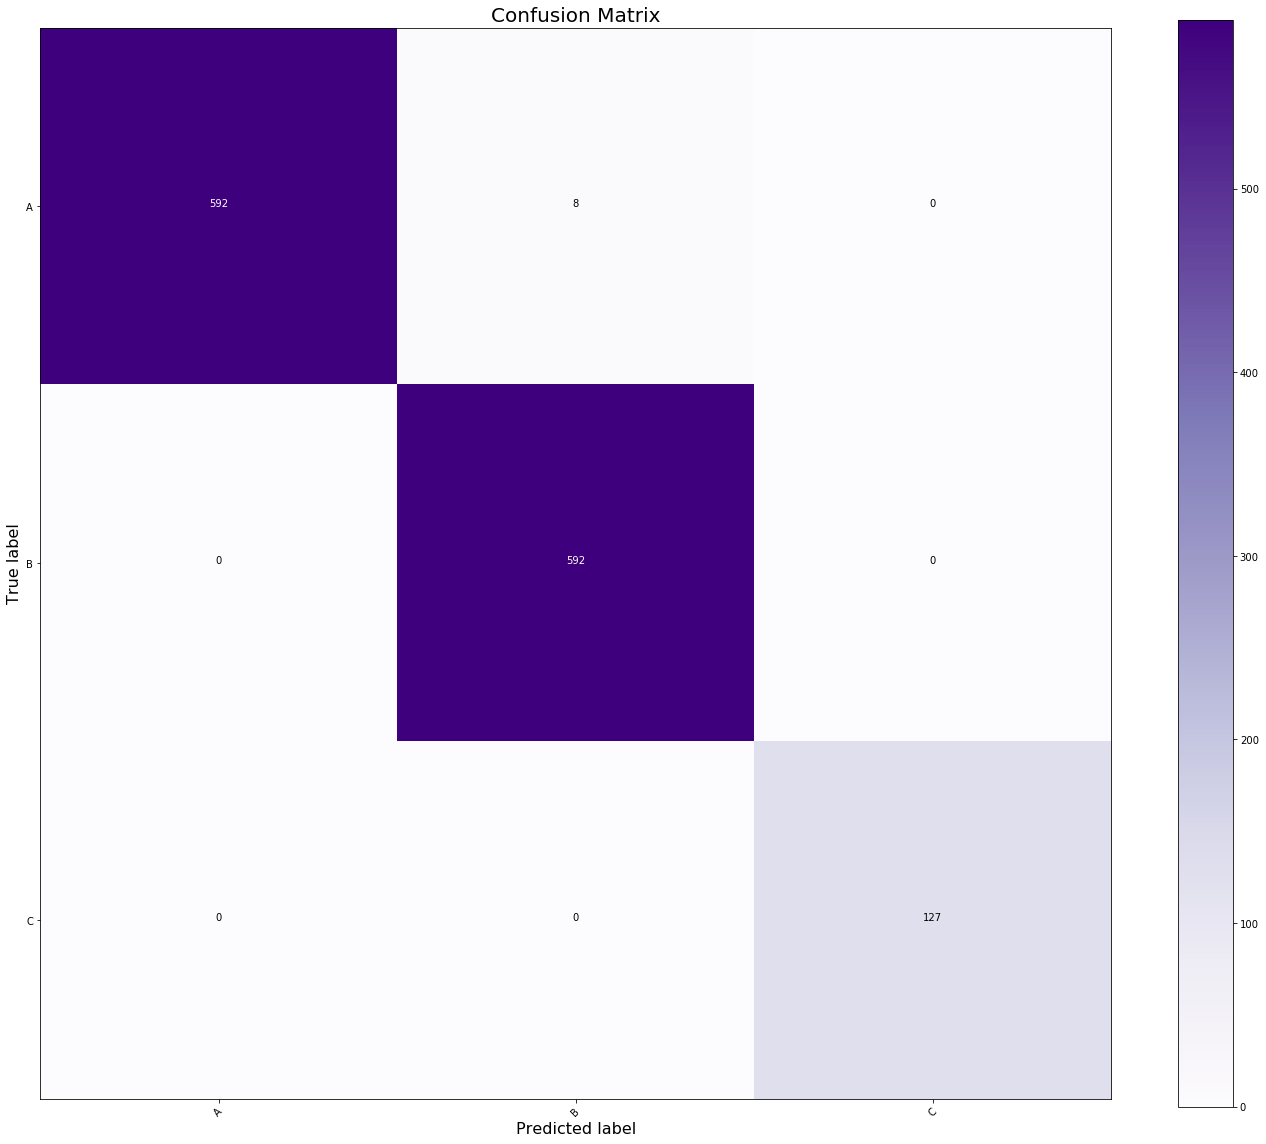

In [20]:
y_test_pred1 = model1.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(Y_test, y_test_pred1)

## VGG16 

In [22]:
from keras.applications import VGG16   #VGG16 pretrained weights    

In [23]:
vgg_base = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 5s 0us/step


In [25]:
model3 = Sequential() 
model3.add(vgg_base)
model3.add(Flatten()) 
model3.add(Dense(8192,activation='relu'))
model3.add(Dropout(0.8))
model3.add(Dense(4096,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 8192)              205529088 
_________________________________________________________________
dropout_9 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 4096)              33558528  
_________________________________________________________________
dropout_10 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                

In [26]:
# Compile 
sgd = SGD(lr=0.001)
model3.compile(loss='categorical_crossentropy', optimizer=sgd,    metrics=['accuracy'])

In [27]:
# Train
model3.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1,validation_data=(X_test,Y_test))

Train on 5274 samples, validate on 1319 samples
Epoch 1/15
5274/5274 [==============================] - 49s 9ms/step - loss: 0.6528 - accuracy: 0.7410 - val_loss: 0.0767 - val_accuracy: 0.9742
Epoch 2/15
5274/5274 [==============================] - 45s 8ms/step - loss: 0.0839 - accuracy: 0.9685 - val_loss: 0.0090 - val_accuracy: 0.9985
Epoch 3/15
5274/5274 [==============================] - 45s 8ms/step - loss: 0.0275 - accuracy: 0.9924 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/15
5274/5274 [==============================] - 45s 9ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 6.9394e-04 - val_accuracy: 1.0000
Epoch 5/15
5274/5274 [==============================] - 45s 9ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 2.8102e-04 - val_accuracy: 1.0000
Epoch 6/15
5274/5274 [==============================] - 45s 8ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 3.1170e-04 - val_accuracy: 1.0000
Epoch 7/15
5274/5274 [==============================] - 45s 9ms/step -

### In this model finally we got accuracy, Validation accuracy and test accuracy of 100%.

In [28]:
model3.evaluate(X_test,Y_test)

1319/1319 [==============================] - 4s 3ms/step


[1.5998445591097008e-05, 1.0]

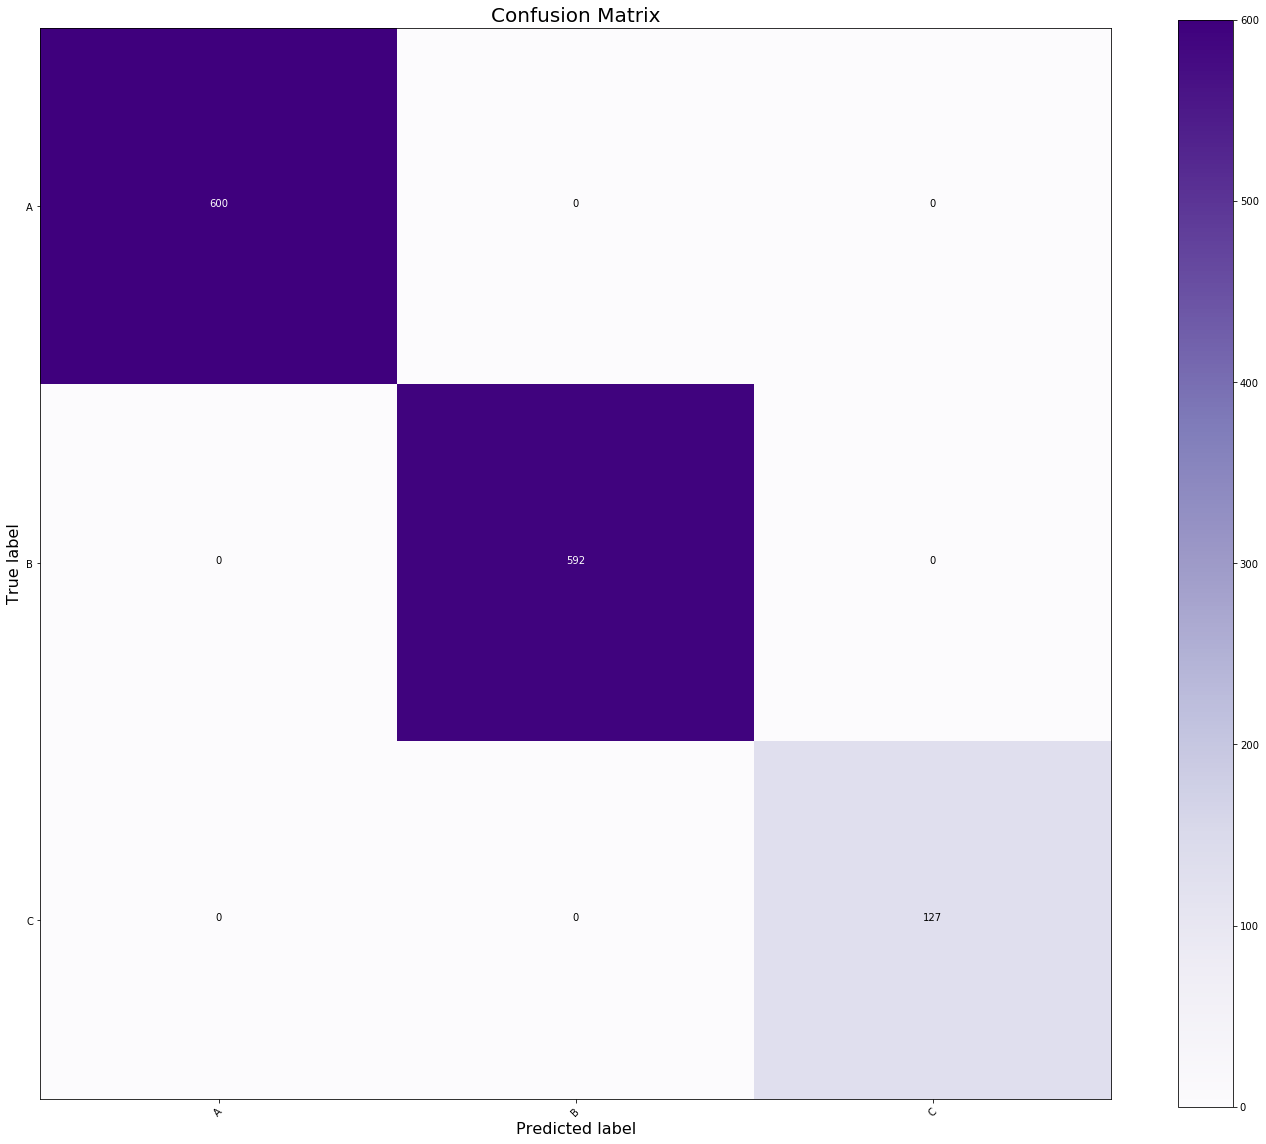

In [29]:
y_test_pred2 = model3.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(Y_test, y_test_pred2)